In [1]:
import pandas as pd
import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,  Concatenate, Lambda
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns


import functions as f

/home/hari/cODE/functions.py:179: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if input("Create tokenizers? Enter y if this is new training data. y/n: ") is 'y': create_tokenizers(df_test)
/home/hari/cODE/functions.py:406: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if pad is 'center':
/home/hari/cODE/functions.py:420: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if pad is 'center':


In [2]:
def load_data(D,randomize=False):
    try:
        with open("df_train_"+str(D)+"D.pkl", "rb") as fh:
          df_train = pickle.load(fh)
    except:
        df_train = pd.read_pickle("hyppi-train-data.pkl")
    try:
        with open("df_test_"+str(D)+"D.pkl", "rb") as fh:
          df_test = pickle.load(fh)
    except:
        df_test = pd.read_pickle("hyppi-test-data.pkl")
    if randomize:
        return f.shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(3)
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[M, S, L, K, L, Q, A, S, N, V, T, N, K, N, D, ..."
1,"[M, K, D, V, P, G, F, L, Q, Q, S, Q, N, S, G, ..."
2,"[M, A, Q, S, R, D, G, G, N, P, F, A, E, P, S, ..."
3,"[M, G, V, D, I, R, H, N, K, D, R, K, V, R, R, ..."
4,"[M, N, V, A, A, K, Y, R, M, A, S, L, Y, V, G, ..."
...,...
6995,"[M, T, H, E, E, H, H, A, A, K, T, L, G, I, G, ..."
6996,"[M, S, A, E, G, Y, Q, Y, R, A, L, Y, D, Y, K, ..."
6997,"[M, W, P, T, R, R, L, V, T, I, K, R, S, G, V, ..."
6998,"[M, L, R, V, A, W, R, T, L, S, L, I, R, T, R, ..."


Median length of Joined sequence is 953


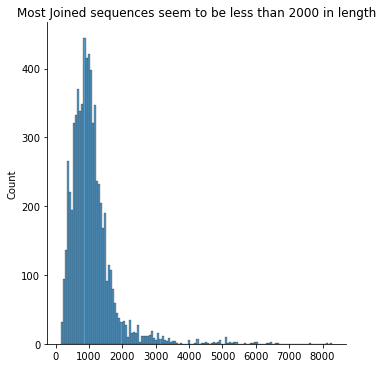

In [3]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 8286
min sequence_data length: 154
median sequence_data length: 953


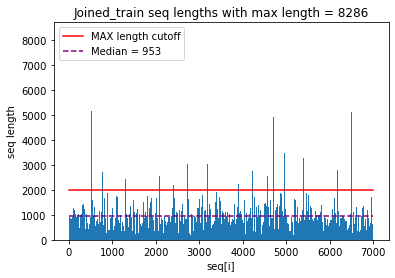

max word index: 22
Found 22 unique tokens.
pre padding.
Shape of data tensor: (7000, 2000)
max sequences_test length: 6647
min sequences_test length: 165
median sequences_test length: 935


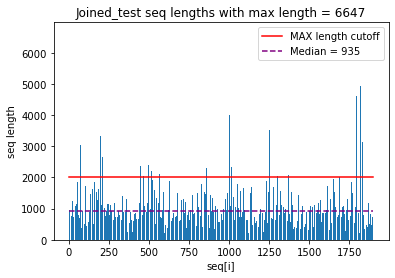

pre padding for test seq.
Shape of data_test tensor: (1899, 2000)
num_words is 23


In [4]:
data_1D_join_pre,data_test_1D_join_pre,num_words_1D_join,MAX_SEQUENCE_LENGTH_1D,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(1000,2000,df_train,df_test, pad='pre', show=True)

In [5]:
data_1D_join_center,data_test_1D_join_center,num_words_1D_join,MAX_SEQUENCE_LENGTH_1D,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(1000,2000,df_train,df_test, pad='center')

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 8286
min sequence_data length: 154
median sequence_data length: 953
max word index: 22
Found 22 unique tokens.
Center padding.
Shape of data tensor: (7000, 2000)
max sequences_test length: 6647
min sequences_test length: 165
median sequences_test length: 935
Center padding for test seq.
Shape of data_test tensor: (1899, 2000)
num_words is 23


In [6]:
data_1D_join_post,data_test_1D_join_post,num_words_1D_join,MAX_SEQUENCE_LENGTH_1D,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(1000,2000,df_train,df_test, pad='post')

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 8286
min sequence_data length: 154
median sequence_data length: 953
max word index: 22
Found 22 unique tokens.
post padding.
Shape of data tensor: (7000, 2000)
max sequences_test length: 6647
min sequences_test length: 165
median sequences_test length: 935
post padding for test seq.
Shape of data_test tensor: (1899, 2000)
num_words is 23


In [ ]:

EMBEDDING_DIM_1D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 20
M_1D=10


x1 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_1D, EMBEDDING_DIM_1D, num_words_1D_join, M_1D)
x2 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_1D, EMBEDDING_DIM_1D, num_words_1D_join, M_1D)
x3 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_1D, EMBEDDING_DIM_1D, num_words_1D_join, M_1D)

concatenator = Concatenate(axis=1)
x = concatenator([x1.output, x2.output, x3.output])
x = Dense(128)(x)
x = Dropout(0.2)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model1D_join = Model(inputs=[x1.input, x2.input, x3.input], outputs=output)

model1D_join.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'],)

trains = [data_1D_join_pre,data_1D_join_center,data_1D_join_post]
tests = [data_test_1D_join_pre,data_test_1D_join_center,data_test_1D_join_post]


jk = model1D_join.fit(trains,df_train['label'].values, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(tests,df_test['label'].values))
#plot_model(model1D_join, to_file='model_plot.png', show_shapes=True, show_layer_names=False)
print(roc_auc_score(df_test['label'].values, model1D_join.predict(tests)))